In [1]:
pip install kneed

In [2]:
 # DataFrame Manipulation and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
from matplotlib.gridspec import GridSpec
import matplotlib.lines as mlines
import matplotlib.image as mpimg
pd.set_option('display.max_columns', 100)
import plotly.offline as py
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os
import json
import requests
import folium
from folium.plugins import FastMarkerCluster, Fullscreen, MiniMap, HeatMap, HeatMapWithTime, LocateControl
import datetime as dt

# Machine Learning Functions
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# K-means Clustering
import sklearn
from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from mpl_toolkits.mplot3d import Axes3D

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_ord = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Cleaned Data/ord_cleaned.csv")
df_ord.head()

In [28]:
df_seller = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Cleaned Data/seller_monthly_performance.csv")
df_seller.head()

seller_id order_month  total_orders  \
0  0015a82c2db000af6aaaf3ae2ecb0532     2017-09             1   
1  0015a82c2db000af6aaaf3ae2ecb0532     2017-10             2   
2  001cca7ae9ae17fb1caed9dfb1094831     2017-02             5   
3  001cca7ae9ae17fb1caed9dfb1094831     2017-03            11   
4  001cca7ae9ae17fb1caed9dfb1094831     2017-04            13   

   total_order_value  total_products_sold  avg_review_score  \
0          322439.04                  352          5.000000   
1          644878.08                  704          3.000000   
2           60883.80                  235          4.200000   
3           99828.00                  517          3.454545   
4           98114.85                  611          4.000000   

   unique_products_sold  total_customers  geolocation_lat  geolocation_lng  \
0                     1                1       -23.644439       -46.539885   
1                     1                2       -23.644439       -46.539885   
2                     1                5       -20.297537       -40.400869   
3                     3               11       -20.297537       -40.400869   
4                     5               13       -20.297537       -40.400869   

  geolocation_city geolocation_state      top_category  
0      santo andre                SP  small_appliances  
1      santo andre                SP  small_appliances  
2        cariacica                ES      garden_tools  
3        cariacica                ES      garden_tools  
4        cariacica                ES      garden_tools

In [ ]:
pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 54.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=7e488cb21383eb16485f3f9cd03160e8660a365488a32ca179cbc0cb6e92f075
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
from ydata_profiling import ProfileReport

# Generate the report
profile = ProfileReport(df_seller, title="Pandas Profiling Report", explorative=True)

# Show it directly inside the notebook
profile.to_notebook_iframe()


Output hidden; open in https://colab.research.google.com to view.

# Seller Segmentation

Goal: Identify high-value vs. underperforming sellers.
Variables to Use:

total_order_value (Monetary value)

total_orders (Frequency)

avg_review_score (Customer satisfaction)

unique_products_sold (Product diversity)

In [ ]:
df_seller.describe()

total_orders  total_order_value  total_products_sold  avg_review_score  \
count  15991.000000       1.599100e+04         15991.000000      15991.000000   
mean       6.101807       1.368340e+05           905.453693          4.168041   
std       12.712583       3.504044e+05          2379.979627          0.962803   
min        1.000000       2.629000e+01             1.000000          1.000000   
25%        1.000000       1.215087e+04           111.000000          3.888889   
50%        2.000000       3.692925e+04           274.000000          4.419355   
75%        6.000000       1.148635e+05           728.000000          5.000000   
max      271.000000       7.245982e+06         75810.000000          5.000000   

       unique_products_sold  total_customers  geolocation_lat  \
count          15991.000000     15991.000000     15991.000000   
mean               3.827090         6.101807       -22.968688   
std                5.762351        12.712583         3.000548   
min                1.000000         1.000000       -36.605374   
25%                1.000000         1.000000       -23.636657   
50%                2.000000         2.000000       -23.476666   
75%                4.000000         6.000000       -22.136516   
max               93.000000       271.000000        -2.546079   

       geolocation_lng  log_total_orders  log_order_value  sqrt_products_sold  \
count     15991.000000      15991.000000     15991.000000        15991.000000   
mean        -47.352177          1.463164        10.517381            1.708748   
std           2.638736          0.834969         1.663716            0.952537   
min         -64.283946          0.693147         3.306520            1.000000   
25%         -48.901781          0.693147         9.405238            1.000000   
50%         -46.797040          1.098612        10.516786            1.414214   
75%         -46.519058          1.945910        11.651508            2.000000   
max         -34.847856          5.605802        15.795958            9.643651   

       boxcox_order_value       cluster   review_size       Cluster  \
count        15991.000000  15991.000000  15991.000000  15991.000000   
mean            11.289844      2.084673     20.840205      2.362892   
std              1.906434      1.728569      4.814017      1.478407   
min              3.378518      0.000000      5.000000      0.000000   
25%             10.003559      0.000000     19.444444      1.000000   
50%             11.268574      2.000000     22.096774      3.000000   
75%             12.578931      3.000000     25.000000      4.000000   
max             17.532272      5.000000     25.000000      5.000000   

       Scaled_Diversity  Scaled_Frequency  Scaled_Monetary  
count      1.599100e+04      1.599100e+04     1.599100e+04  
mean      -1.652942e-16      1.830677e-16    -4.087920e-16  
std        1.000031e+00      1.000031e+00     1.000031e+00  
min       -7.440868e-01     -9.222393e-01    -4.334326e+00  
25%       -7.440868e-01     -9.222393e-01    -6.684904e-01  
50%       -3.092203e-01     -4.366190e-01    -3.577610e-04  
75%        3.057739e-01      5.781788e-01     6.817045e-01  
max        8.330543e+00      4.961584e+00     3.172863e+00

from matplotlib import pyplot as plt
_df_12['total_orders'].plot(kind='hist', bins=20, title='total_orders')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['total_order_value'].plot(kind='hist', bins=20, title='total_order_value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['total_products_sold'].plot(kind='hist', bins=20, title='total_products_sold')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15['avg_review_score'].plot(kind='hist', bins=20, title='avg_review_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:1345: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x='total_orders', y='total_order_value', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:1345: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



from matplotlib import pyplot as plt
_df_17.plot(kind='scatter', x='total_order_value', y='total_products_sold', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:1345: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



from matplotlib import pyplot as plt
_df_18.plot(kind='scatter', x='total_products_sold', y='avg_review_score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:1345: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



from matplotlib import pyplot as plt
_df_19.plot(kind='scatter', x='avg_review_score', y='unique_products_sold', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20['total_orders'].plot(kind='line', figsize=(8, 4), title='total_orders')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_21['total_order_value'].plot(kind='line', figsize=(8, 4), title='total_order_value')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_22['total_products_sold'].plot(kind='line', figsize=(8, 4), title='total_products_sold')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_23['avg_review_score'].plot(kind='line', figsize=(8, 4), title='avg_review_score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_24['total_orders'].plot(kind='hist', bins=20, title='total_orders')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_25['total_order_value'].plot(kind='hist', bins=20, title='total_order_value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_26['total_products_sold'].plot(kind='hist', bins=20, title='total_products_sold')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_27['avg_review_score'].plot(kind='hist', bins=20, title='avg_review_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_28.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:1345: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



from matplotlib import pyplot as plt
_df_29.plot(kind='scatter', x='total_orders', y='total_order_value', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:1345: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



from matplotlib import pyplot as plt
_df_30.plot(kind='scatter', x='total_order_value', y='total_products_sold', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:1345: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



from matplotlib import pyplot as plt
_df_31.plot(kind='scatter', x='total_products_sold', y='avg_review_score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:1345: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



from matplotlib import pyplot as plt
_df_32.plot(kind='scatter', x='avg_review_score', y='unique_products_sold', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_33['total_orders'].plot(kind='line', figsize=(8, 4), title='total_orders')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_34['total_order_value'].plot(kind='line', figsize=(8, 4), title='total_order_value')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_35['total_products_sold'].plot(kind='line', figsize=(8, 4), title='total_products_sold')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_36['avg_review_score'].plot(kind='line', figsize=(8, 4), title='avg_review_score')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_37['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_37, x='total_orders', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_38['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_38, x='total_order_value', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_39['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_39, x='total_products_sold', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_40['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_40, x='avg_review_score', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [29]:
features = df_seller[[
    'total_orders',
    'total_order_value',
    'avg_review_score',
    'unique_products_sold'
]]

In [31]:
features.describe().T

count           mean            std    min  \
total_orders          16019.0       6.092890      12.703255   1.00   
total_order_value     16019.0  136696.850272  350143.358610  26.29   
avg_review_score      15991.0       4.168041       0.962803   1.00   
unique_products_sold  16019.0       3.822211       5.758498   1.00   

                               25%           50%         75%        max  
total_orders              1.000000      2.000000       6.000      271.0  
total_order_value     12113.465000  36877.050000  114776.645  7245981.6  
avg_review_score          3.888889      4.419355       5.000        5.0  
unique_products_sold      1.000000      2.000000       4.000       93.0

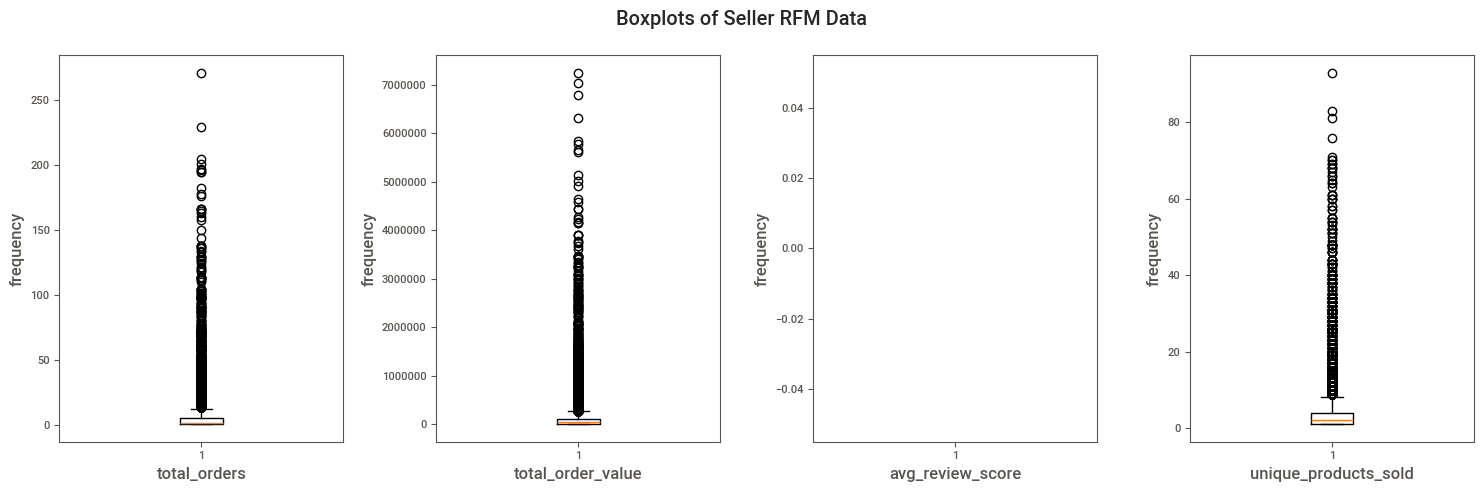

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))  # 1 row, 4 columns

for ax, i in zip(axes, features):
    ax.boxplot(features[i])
    ax.set_xlabel(i)
    ax.set_ylabel('frequency')
plt.suptitle('Boxplots of Seller RFM Data')
plt.tight_layout()
plt.show()

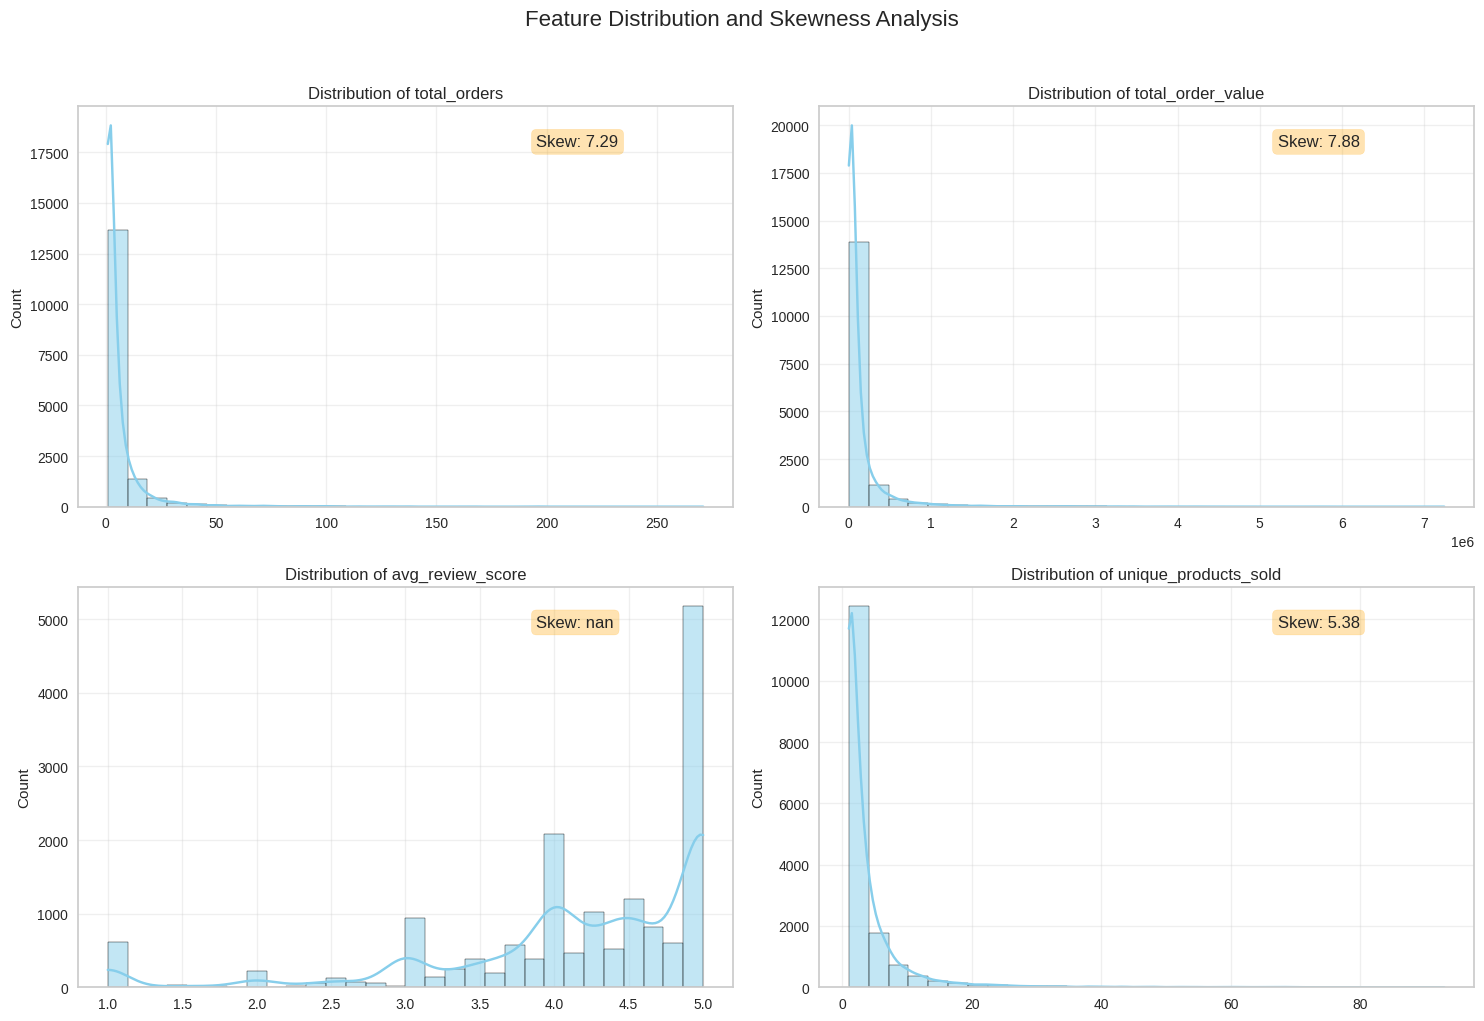

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Plot settings
plt.figure(figsize=(15, 10))
plt.suptitle("Feature Distribution and Skewness Analysis", fontsize=16, y=1.02)

# Create subplots
for i, col in enumerate(features.columns, 1):
    plt.subplot(2, 2, i)

    # Plot histogram with KDE
    sns.histplot(features[col], kde=True, color='skyblue', bins=30)

    # Add skewness annotation
    skewness = skew(features[col])
    plt.annotate(f'Skew: {skewness:.2f}',
                xy=(0.7, 0.9),
                xycoords='axes fraction',
                bbox=dict(boxstyle='round', alpha=0.3, color='orange'))

    # Formatting
    plt.title(f'Distribution of {col}')
    plt.xlabel('')
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [6]:
from scipy.stats import skew, boxcox

In [37]:
print(df_seller.isna().sum())

seller_id                0
order_month              0
total_orders             0
total_order_value        0
total_products_sold      0
avg_review_score        28
unique_products_sold     0
total_customers          0
geolocation_lat          0
geolocation_lng          0
geolocation_city         0
geolocation_state        0
top_category             0
dtype: int64


In [39]:
df_seller=df_seller.dropna()

In [11]:
# Define skewed features
skewed_features = ['total_orders', 'total_order_value', 'unique_products_sold']

# Apply transformations
df_seller['log_total_orders'] = np.log1p(df_seller['total_orders'])
df_seller['log_order_value'] = np.log1p(df_seller['total_order_value'])
df_seller['sqrt_products_sold'] = np.sqrt(df_seller['unique_products_sold'])

# Box-Cox for 'total_order_value' (alternative to log)
df_seller['boxcox_order_value'], _ = boxcox(df_seller['total_order_value'] + 1)  # +1 to handle zeros

# Check new skewness
for feature in skewed_features:
    orig_skew = skew(df_seller[feature])
    log_skew = skew(np.log1p(df_seller[feature]))
    print(f"{feature}: Original Skew = {orig_skew:.2f}, Log Skew = {log_skew:.2f}")

total_orders: Original Skew = 7.28, Log Skew = 1.28
total_order_value: Original Skew = 7.87, Log Skew = -0.07
unique_products_sold: Original Skew = 5.38, Log Skew = 1.30


In [12]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(df_seller[['avg_review_score', 'log_total_orders', 'log_order_value','sqrt_products_sold']])

In [35]:
print(np.isnan(rfm_scaled).sum())

0


Optimal number of clusters: 4


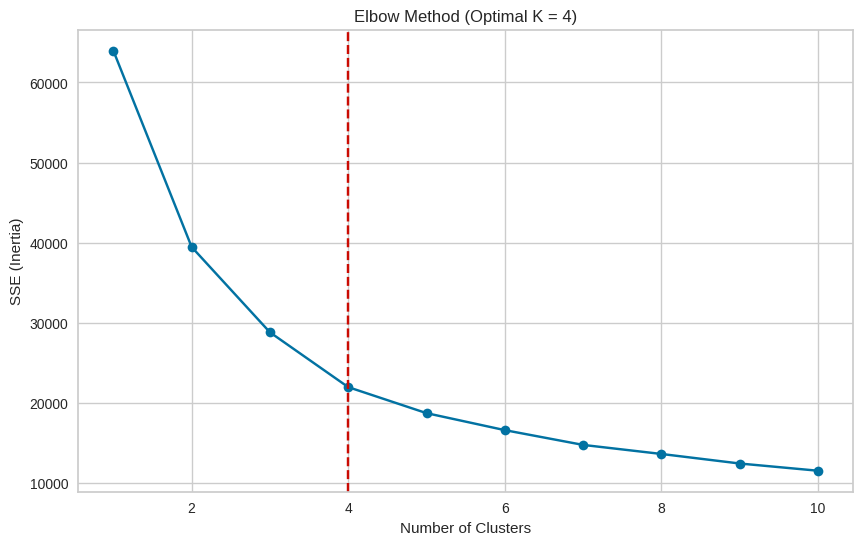

In [21]:
# 7. Elbow method with NaN-free data
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=1)
    kmeans.fit(rfm_scaled)  # Now works because we imputed NaNs
    sse[k] = kmeans.inertia_

# 8. Find optimal k
knee_locator = KneeLocator(
    x=list(sse.keys()),
    y=list(sse.values()),
    curve='convex',
    direction='decreasing'
)
optimal_k = knee_locator.elbow

print(f"Optimal number of clusters: {optimal_k}")

# 9. Final clustering
final_kmeans = KMeans(n_clusters=optimal_k, random_state=1)
df_seller['cluster'] = final_kmeans.fit_predict(rfm_scaled)

# 10. Visualize the elbow curve
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.axvline(x=optimal_k, color='r', linestyle='--')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE (Inertia)")
plt.title(f"Elbow Method (Optimal K = {optimal_k})")
plt.show()

In [42]:
# Use k=4 as a practical optimal value
optimal_k = 4

# Final clustering with optimal_k
final_kmeans = KMeans(n_clusters=optimal_k, random_state=1)
df_seller['cluster'] = final_kmeans.fit_predict(rfm_scaled)

In [43]:
print(df_seller['cluster'])

0        0
1        0
2        0
3        1
4        1
        ..
16014    2
16015    2
16016    0
16017    0
16018    1
Name: cluster, Length: 15991, dtype: int32


In [24]:
# Simulating a 3-dimensional scaled dataset for visualization

# Feature Scaling
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(df_seller[['sqrt_products_sold', 'log_total_orders', 'log_order_value']])

# Fit the KMeans model
kmeans_3d = KMeans(n_clusters= 4, init='k-means++', n_init=10, max_iter=300, random_state=42)
kmeans_3d.fit(rfm_scaled)

# Predicting the clusters
labels_3d = kmeans_3d.predict(rfm_scaled)

# Prepare the data for the 3D cluster graph
df_seller['Cluster'] = labels_3d
df_seller['Scaled_Diversity'] = rfm_scaled[:, 0]
df_seller['Scaled_Frequency'] = rfm_scaled[:, 1]
df_seller['Scaled_Monetary'] = rfm_scaled[:, 2]

# Create a 3D scatter plot
fig = px.scatter_3d(df_seller, x='Scaled_Diversity', y='Scaled_Frequency', z='Scaled_Monetary',
                    color='Cluster', labels={'Cluster': 'Cluster Label'})

# Update the layout to make the plot larger, set a proper aspect ratio, and add a bold title
fig.update_layout(
    width=800,  # Adjust the width of the graph
    height=600,  # Adjust the height of the graph
    scene=dict(
        aspectmode='auto'  # Adjust the aspect ratio
    ),
    legend_title_text='Cluster',
    title={
        'text': "<b>3D Cluster Graph</b>",  # Add a bold title using HTML tags
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

# Update the marker size
fig.update_traces(marker=dict(size=5))

# Show the figure
fig.show()

In [46]:
# Step 4: Compute overall average
overall_avg = df_seller[features].mean()

# Step 5: Compute cluster-wise average
cluster_avg = df_seller.groupby("cluster")[features].mean()

# Step 6: Compute index
index_table = cluster_avg.divide(overall_avg)  # cluster avg / overall avg
index_table = index_table.reset_index()


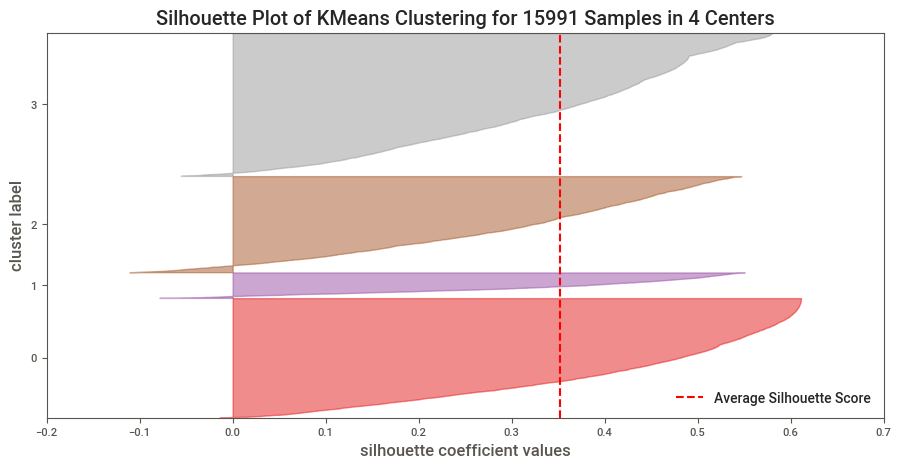

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 15991 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# Instantiate the KMeans model for visualization
kmeans_visualize = KMeans(n_clusters=4, init='k-means++', random_state=42, n_init='auto')

# Instantiate the SilhouetteVisualizer with the KMeans model
visualizer = SilhouetteVisualizer(kmeans_visualize, size=(1080, 500))

# Fit the visualizer to the scaled features
visualizer.fit(rfm_scaled)

# Show the silhouette plot
visualizer.show()

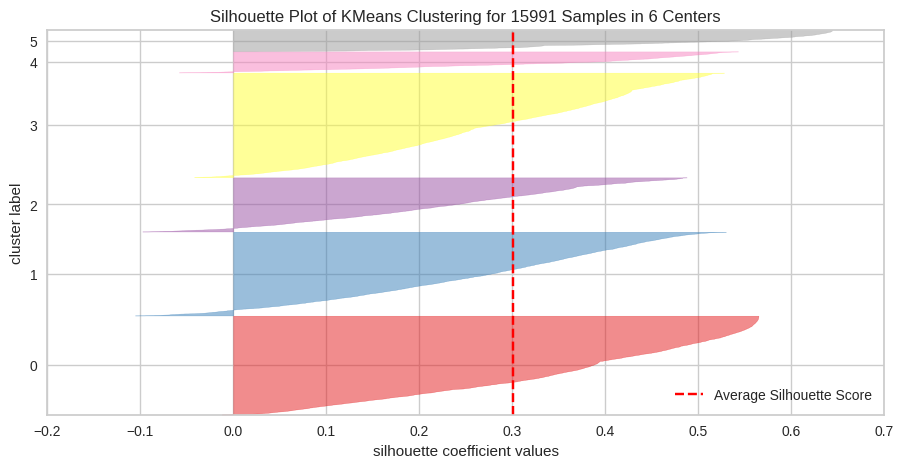

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 15991 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# Instantiate the KMeans model for visualization
kmeans_visualize = KMeans(n_clusters=6, init='k-means++', random_state=42, n_init='auto')

# Instantiate the SilhouetteVisualizer with the KMeans model
visualizer = SilhouetteVisualizer(kmeans_visualize, size=(1080, 500))

# Fit the visualizer to the scaled features
visualizer.fit(rfm_scaled)

# Show the silhouette plot
visualizer.show()

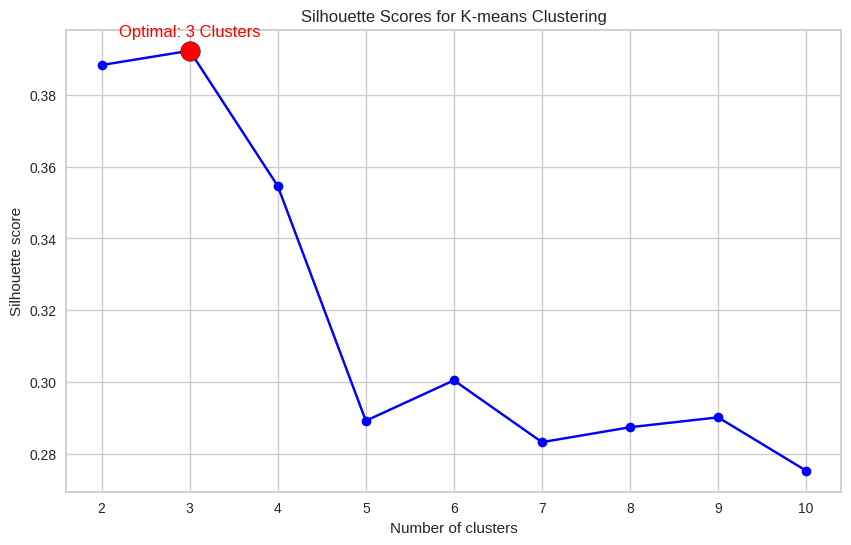

In [16]:
# Calculate silhouette scores for different numbers of clusters using k-means++ for initialization
silhouette_scores = []
for n_clusters in range(2,11):  # Test a range of cluster counts from 2 to 10
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300, random_state=42)
    labels = kmeans.fit_predict(rfm_scaled)
    silhouette_avg = silhouette_score(rfm_scaled, labels)
    silhouette_scores.append((n_clusters, silhouette_avg))

# Find the optimal number of clusters (highest silhouette score)
optimal_n_clusters = max(silhouette_scores, key=lambda x: x[1])[0]

# Convert the silhouette scores to a numpy array for plotting
silhouette_array = np.array(silhouette_scores)

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(silhouette_array[:, 0], silhouette_array[:, 1], 'o-', color='blue')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Scores for K-means Clustering')

# Circle the optimal number of clusters
plt.scatter(optimal_n_clusters, max(silhouette_array[:, 1]), s=200, c='red', edgecolor='black', zorder=5)
plt.annotate(f'Optimal: {optimal_n_clusters} Clusters',
             (optimal_n_clusters, max(silhouette_array[:, 1])),
             textcoords="offset points",
             xytext=(0,10),
             ha='center',
             color='red')

plt.grid(True)

In [ ]:
# Simulating a 3-dimensional scaled dataset for visualization

# Feature Scaling
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(df_seller[['sqrt_products_sold', 'log_total_orders', 'log_order_value']])

# Fit the KMeans model
kmeans_3d = KMeans(n_clusters= 6, init='k-means++', n_init=10, max_iter=300, random_state=42)
kmeans_3d.fit(rfm_scaled)

# Predicting the clusters
labels_3d = kmeans_3d.predict(rfm_scaled)

# Prepare the data for the 3D cluster graph
df_seller['Cluster'] = labels_3d
df_seller['Scaled_Diversity'] = rfm_scaled[:, 0]
df_seller['Scaled_Frequency'] = rfm_scaled[:, 1]
df_seller['Scaled_Monetary'] = rfm_scaled[:, 2]

# Create a 3D scatter plot
fig = px.scatter_3d(df_seller, x='Scaled_Diversity', y='Scaled_Frequency', z='Scaled_Monetary',
                    color='Cluster', labels={'Cluster': 'Cluster Label'})

# Update the layout to make the plot larger, set a proper aspect ratio, and add a bold title
fig.update_layout(
    width=800,  # Adjust the width of the graph
    height=600,  # Adjust the height of the graph
    scene=dict(
        aspectmode='auto'  # Adjust the aspect ratio
    ),
    legend_title_text='Cluster',
    title={
        'text': "<b>3D Cluster Graph</b>",  # Add a bold title using HTML tags
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

# Update the marker size
fig.update_traces(marker=dict(size=5))

# Show the figure
fig.show()

<ipython-input-51-43a8c9aac701>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-51-43a8c9aac701>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-51-43a8c9aac701>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-51-43a8

In [ ]:
# 5. Prepare for Visualization
df_seller['review_size'] = ((df_seller['avg_review_score'] - df_seller['avg_review_score'].min()) /
                          (df_seller['avg_review_score'].max() - df_seller['avg_review_score'].min()) * 20 + 5)

# 6. Create output directory if it doesn't exist
os.makedirs('cluster_results', exist_ok=True)

# 7. Save the clustered data to CSV
df_seller.to_csv('cluster_results/seller_clusters.csv', index=False)

# 8. Save the visualization as HTML
fig = px.scatter_3d(
    df_seller,
    x='log_total_orders',
    y='log_order_value',
    z='sqrt_products_sold',
    color='cluster',
    size='review_size',
    hover_data=['seller_id', 'geolocation_state', 'avg_review_score'],
    title='<b>Seller Clusters by Frequency, Revenue, Diversity</b><br>Size = Review Score',
    labels={
        'log_total_orders': 'Orders (log)',
        'log_order_value': 'Revenue (log)',
        'sqrt_products_sold': 'Diversity (sqrt)'
    }
)

fig.update_layout(
    scene=dict(
        xaxis_title='Order Frequency',
        yaxis_title='Revenue',
        zaxis_title='Product Diversity'
    ),
    width=1800,
    height=1200
)

fig.show()

In [ ]:
# Simulating a 3-dimensional scaled dataset for visualization

# Feature Scaling
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(df_seller[['sqrt_products_sold', 'log_total_orders', 'log_order_value']])

# Fit the KMeans model
kmeans_3d = KMeans(n_clusters= 6, init='k-means++', n_init=10, max_iter=300, random_state=42)
kmeans_3d.fit(rfm_scaled)

# Predicting the clusters
labels_3d = kmeans_3d.predict(rfm_scaled)

# Prepare the data for the 3D cluster graph
df_seller['Cluster'] = labels_3d
df_seller['Scaled_Diversity'] = rfm_scaled[:, 0]
df_seller['Scaled_Frequency'] = rfm_scaled[:, 1]
df_seller['Scaled_Monetary'] = rfm_scaled[:, 2]

# Create a 3D scatter plot
fig = px.scatter_3d(df_seller, x='Scaled_Diversity', y='Scaled_Frequency', z='Scaled_Monetary',
                    color='Cluster', labels={'Cluster': 'Cluster Label'})

# Update the layout to make the plot larger, set a proper aspect ratio, and add a bold title
fig.update_layout(
    width=1600,  # Adjust the width of the graph
    height=1200,  # Adjust the height of the graph
    scene=dict(
        aspectmode='auto'  # Adjust the aspect ratio
    ),
    legend_title_text='Cluster',
    title={
        'text': "<b>3D Cluster Graph</b>",  # Add a bold title using HTML tags
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

# Update the marker size
fig.update_traces(marker=dict(size=5))

# Show the figure
fig.show()

Silhouette Score for 6 clusters: 0.355


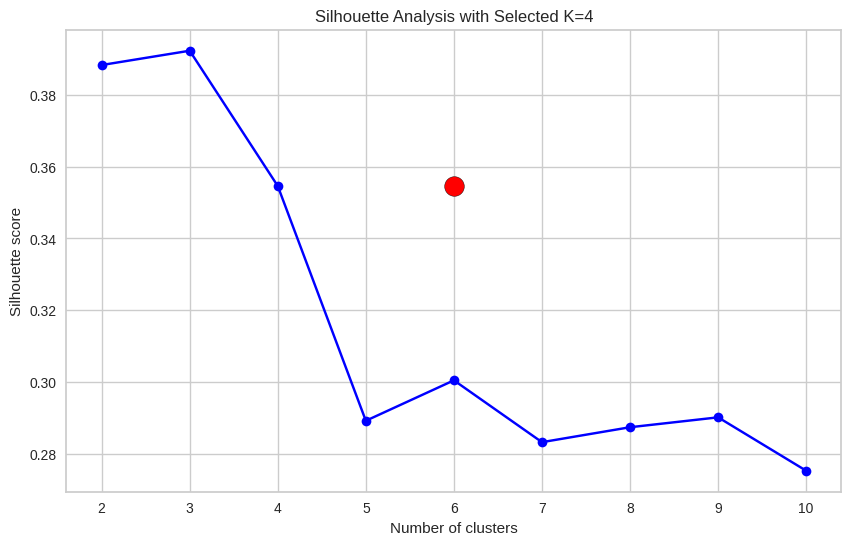

In [20]:
final_kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=42)
cluster_labels = final_kmeans.fit_predict(rfm_scaled)

# 3. Assign clusters back to original DataFrame
df_seller['cluster'] = cluster_labels

# 4. Calculate silhouette score for k=4
silhouette_avg = silhouette_score(rfm_scaled, cluster_labels)
print(f"Silhouette Score for 6 clusters: {silhouette_avg:.3f}")

# 5. Visualize silhouette scores (recreate your plot)
plt.figure(figsize=(10, 6))
plt.plot(silhouette_array[:, 0], silhouette_array[:, 1], 'o-', color='blue')
plt.scatter(6, silhouette_avg, s=200, c='red', edgecolor='black', zorder=5)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Analysis with Selected K=4')
plt.grid(True)
plt.show()

# 6. Export clustered data
df_seller.to_csv('rfm_data_with_clusters.csv', index=False)

Cluster Statistics:
        total_orders              total_order_value                \
                mean median count              mean           sum   
cluster                                                             
0               2.33    2.0  5992          85313.93  5.112011e+08   
1               9.35    8.0  3865         207645.22  8.025488e+08   
2               1.54    1.0  5174           8388.25  4.340079e+07   
3              41.12   30.0   960         865584.72  8.309613e+08   

        avg_review_score unique_products_sold         
                    mean                 mean    sum  
cluster                                               
0                   4.15                 1.91  11456  
1                   4.16                 5.86  22636  
2                   4.20                 1.38   7136  
3                   4.11                20.80  19971  


<ipython-input-45-6c80b37400d0>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-45-6c80b37400d0>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-45-6c80b37400d0>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-45-6c80b37400d0>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




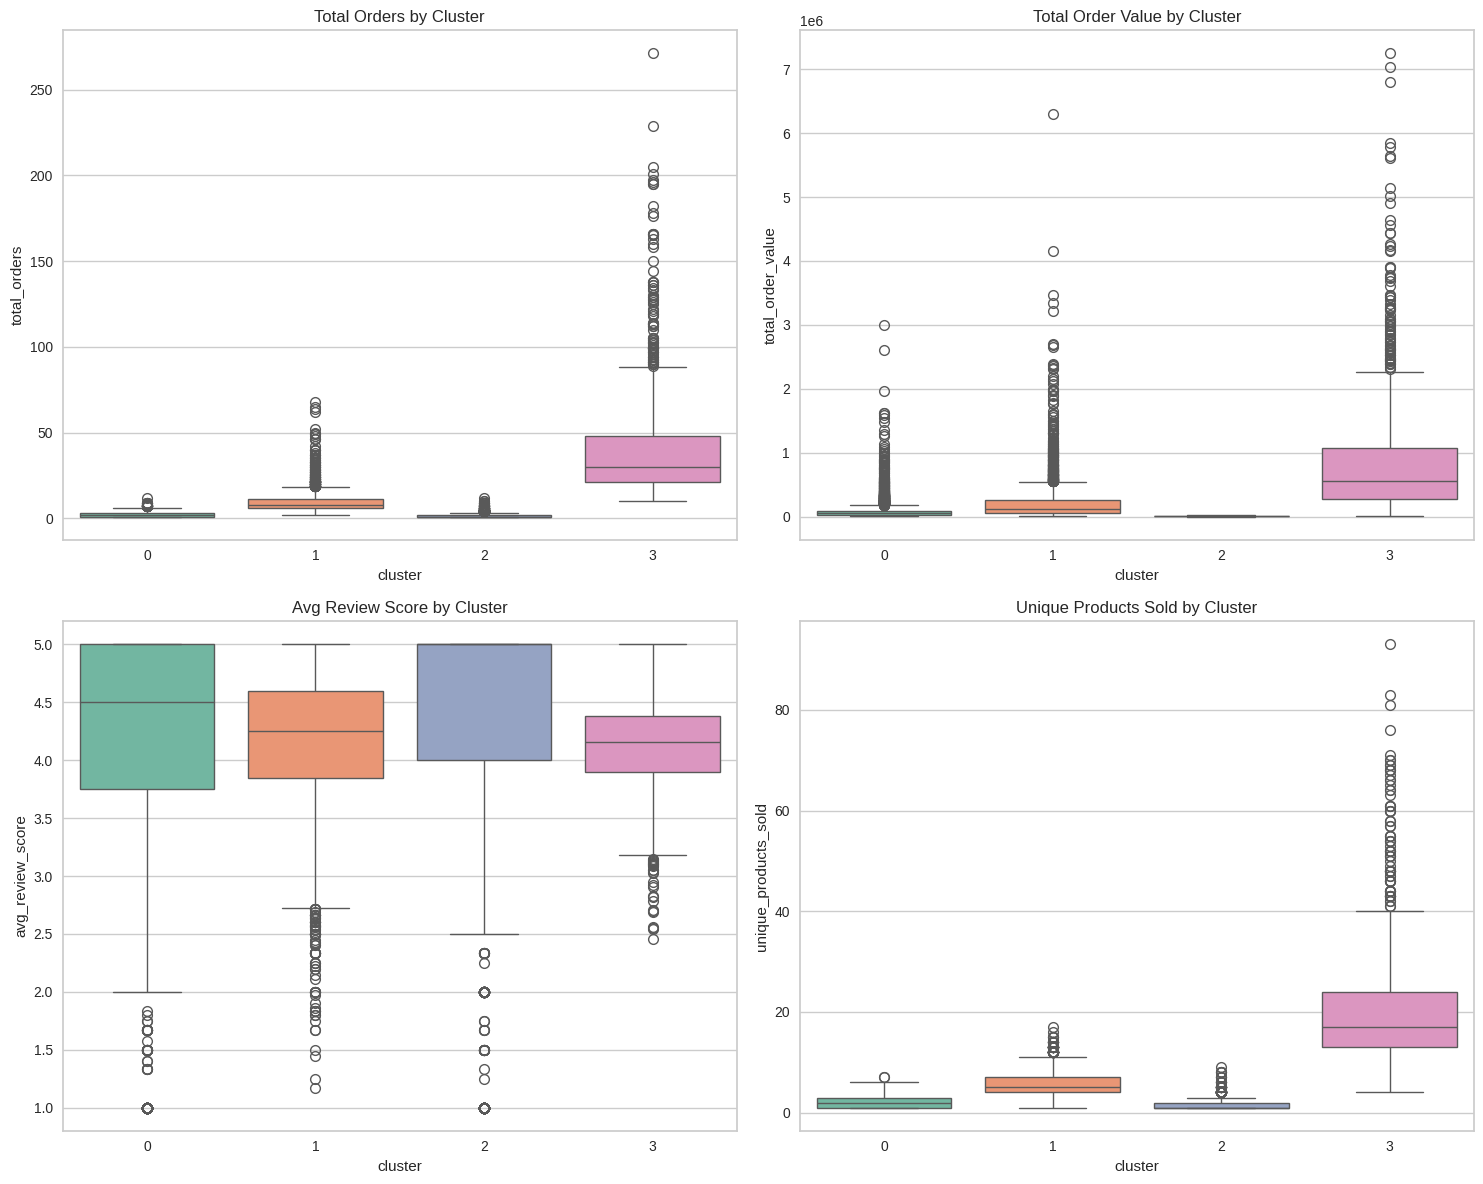

In [45]:
# Group by cluster and calculate stats
cluster_profile = df_seller.groupby('cluster').agg({
    'total_orders': ['mean', 'median', 'count'],
    'total_order_value': ['mean', 'sum'],
    'avg_review_score': 'mean',
    'unique_products_sold': ['mean', 'sum']
}).round(2)

# Print profile
print("Cluster Statistics:")
print(cluster_profile)

# Visualize distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
features = ['total_orders', 'total_order_value', 'avg_review_score', 'unique_products_sold']

for i, feature in enumerate(features):
    row, col = i // 2, i % 2
    sns.boxplot(data=df_seller, x='cluster', y=feature, ax=axes[row, col], palette='Set2')
    axes[row, col].set_title(f'{feature.replace("_", " ").title()} by Cluster')

plt.tight_layout()
plt.show()

In [ ]:
# Calculate overall means
overall_means = df_seller[features].mean()

# Group by cluster and calculate mean, then compare to overall
cluster_index = df_seller.groupby('cluster')[features].mean() / overall_means

# Rename columns for clarity
cluster_index = cluster_index.rename(columns={
    'total_orders': 'orders_index',
    'total_order_value': 'revenue_index',
    'avg_review_score': 'review_index',
    'unique_products_sold': 'variety_index'
})

# Round to 2 decimals and reset index
cluster_index = cluster_index.round(2).reset_index()

print("Cluster Performance Index (vs. Overall Average):")
print(cluster_index)

Cluster Performance Index (vs. Overall Average):
   cluster  orders_index  revenue_index  review_index  variety_index
0        0          0.83           1.72          0.99           0.87
1        1          0.84           0.20          1.00           1.02
2        2          2.72           2.52          1.00           2.42
3        3          0.25           0.40          1.00           0.35
4        4          0.22           0.04          1.01           0.33
5        5          9.30           8.30          0.97           7.56


In [47]:
# Calculate overall means
overall_means = df_seller[features].mean()

# Group by cluster and calculate mean, then compare to overall
cluster_index = df_seller.groupby('cluster')[features].mean() / overall_means

# Rename columns for clarity
cluster_index = cluster_index.rename(columns={
    'total_orders': 'orders_index',
    'total_order_value': 'revenue_index',
    'avg_review_score': 'review_index',
    'unique_products_sold': 'variety_index'
})

# Round to 2 decimals and reset index
cluster_index = cluster_index.round(2).reset_index()

print("Cluster Performance Index (vs. Overall Average):")
print(cluster_index)

Cluster Performance Index (vs. Overall Average):
   cluster  orders_index  revenue_index  review_index  variety_index
0        0          0.38           0.62          1.00           0.50
1        1          1.53           1.52          1.00           1.53
2        2          0.25           0.06          1.01           0.36
3        3          6.74           6.33          0.98           5.44


🛒 Quick vibe:
Tortoise → Solid sellers, safe bets for the platform.

Worker Bee → Valuable niche specialists, busy in their corner.

Dolphin → High potential sellers, agile and likable.

Owl → Low volume, premium quality sellers.

Sloth → Almost inactive, but charming in a small way.

Blue Whale → Marketplace heavyweights, need to be managed carefully.

In [ ]:
Cluster | Animal | Meaning
0 | Tortoise 🐢 | Steady, reliable, consistent sales over time. No rush, but strong and dependable.
1 | Worker Bee 🐝 | Small, diligent, hardworking sellers — focus on their niche, loyal and persistent.
2 | Dolphin 🐬 | Smart, active, sociable sellers who are growing and engaging well with customers.
3 | Owl 🦉 | Wise and rare — not very active but when they sell, they deliver excellent quality and satisfaction.
4 | Sloth 🦥 | Very slow movers — little activity, but still leave a surprisingly positive impression.
5 | Blue Whale 🐋 | Giants of the marketplace — massive sales, huge product range, dominating presence.

In [ ]:
cluster_names = {
    0: 'Consistent Performers',
    1: 'Niche Players',
    2: 'Growth Builders',
    3: 'Boutique Stars',
    4: 'Dormant Sellers',
    5: 'Market Leaders'
}
animal_map = {
    0: 'Tortoise',
    1: 'Worker Bee',
    2: 'Dolphin',
    3: 'Owl',
    4: 'Sloth',
    5: 'Blue Whale'
}
df_seller['cluster_name'] = df_seller['cluster'].map(cluster_names)
df_seller['cluster_animal'] = df_seller['cluster'].map(animal_map)

In [ ]:
df_seller.to_csv('data_with_clusters.csv', index=False)

In [58]:
cluster_name_map = {
    0: "Volume Kings",
    1: "Top Performers",
    2: "Low-End Masses",
    3: "Rising Stars"
}

# Apply the mapping
df_seller['cluster_name'] = df_seller['cluster'].map(cluster_name_map)


In [56]:
animal_map = {
    0: 'Hedgehog',
    1: 'Dolphin',
    2: 'Sloth',
    3: 'Blue Whale'
}
df_seller['cluster_animal'] = df_seller['cluster'].map(animal_map)

In [59]:
df_seller.to_csv('data_with_4_clusters.csv', index=False)